# Iris

In [ ]:
# Download the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Iris.csv", "Iris.csv")
Iris <- read.csv("Iris.csv", stringsAsFactors = TRUE)

In [ ]:
# Inspect the first few rows
head(Iris)

,sepal.length,sepal.width,petal.length,petal.width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
# Check the class balance
table(Iris$species)


    setosa versicolor  virginica 
        50         50         50 

In [ ]:
# Separate the classes
setosa <- Iris[Iris$species == "setosa",]
versicolor <- Iris[Iris$species == "versicolor",]
virginica <- Iris[Iris$species == "virginica",]

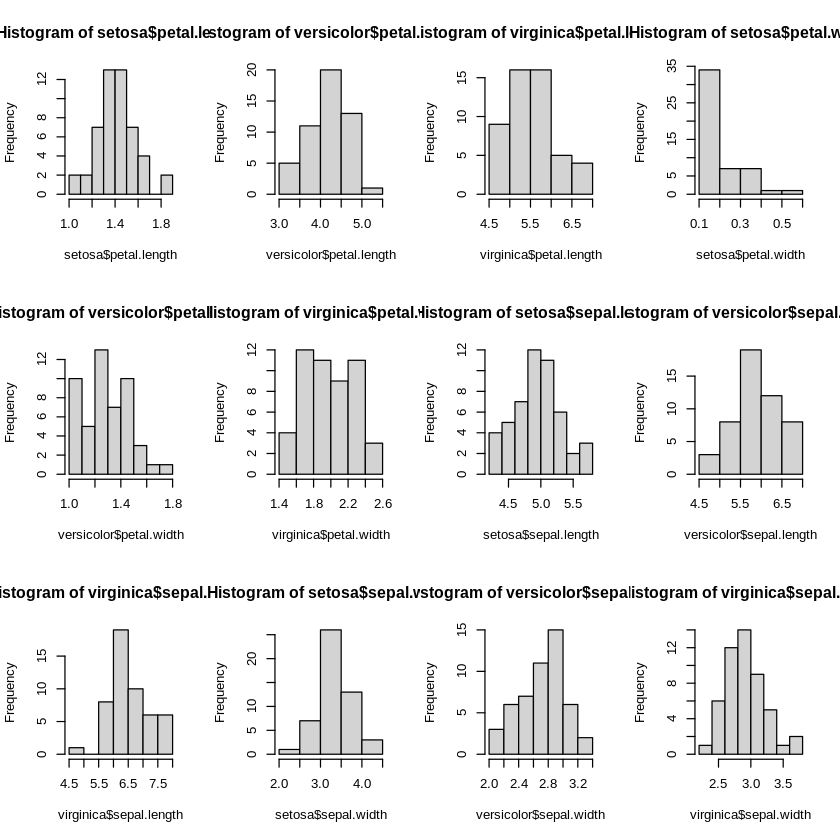

In [ ]:
# Check the predictor distributions
par(mfrow = c(3, 4))
hist(setosa$petal.length)
hist(versicolor$petal.length)
hist(virginica$petal.length)
hist(setosa$petal.width)
hist(versicolor$petal.width)
hist(virginica$petal.width)
hist(setosa$sepal.length)
hist(versicolor$sepal.length)
hist(virginica$sepal.length)
hist(setosa$sepal.width)
hist(versicolor$sepal.width)
hist(virginica$sepal.width)

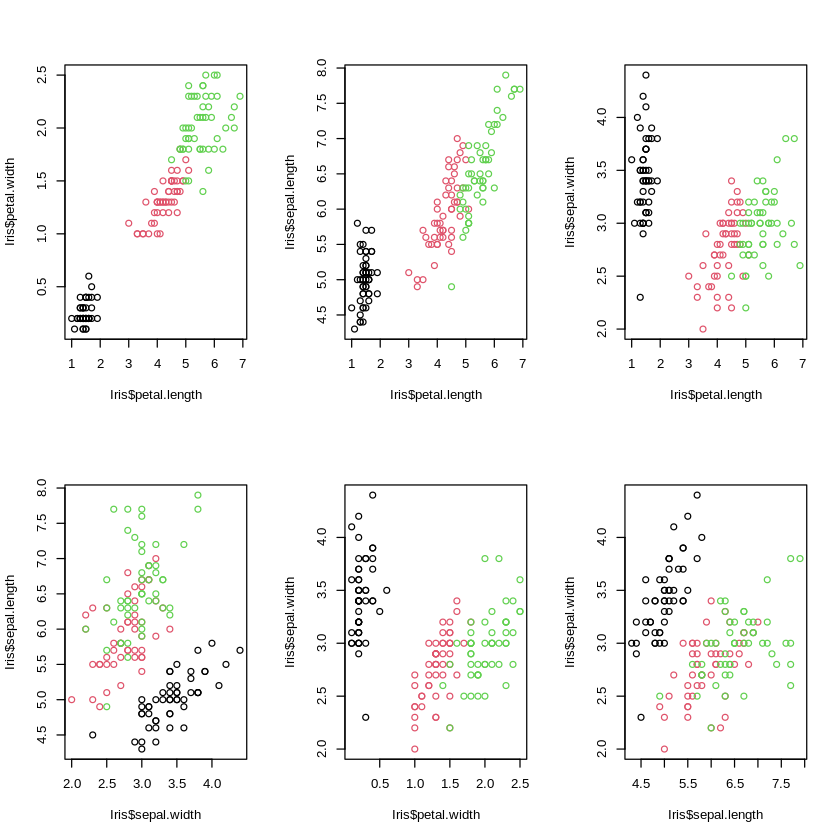

In [ ]:
# Check the predictor relationships
par(mfrow = c(2, 3))
plot(Iris$petal.length, Iris$petal.width, col = Iris$species)
plot(Iris$petal.length, Iris$sepal.length, col = Iris$species)
plot(Iris$petal.length, Iris$sepal.width, col = Iris$species)
plot(Iris$sepal.width, Iris$sepal.length, col = Iris$species)
plot(Iris$petal.width, Iris$sepal.width, col = Iris$species)
plot(Iris$sepal.length, Iris$sepal.width, col = Iris$species)

# Bayesian classifiers

In [ ]:
install.packages("e1071")
library(e1071) # naiveBayes
library(MASS) # lda, qda

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
# Build a Naive Bayes classifier
classify.nb <- naiveBayes(species ~ ., data = Iris)
classify.nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Conditional probabilities:
            sepal.length
Y             [,1]      [,2]
  setosa     5.006 0.3524897
  versicolor 5.936 0.5161711
  virginica  6.588 0.6358796

            sepal.width
Y             [,1]      [,2]
  setosa     3.428 0.3790644
  versicolor 2.770 0.3137983
  virginica  2.974 0.3224966

            petal.length
Y             [,1]      [,2]
  setosa     1.462 0.1736640
  versicolor 4.260 0.4699110
  virginica  5.552 0.5518947

            petal.width
Y             [,1]      [,2]
  setosa     0.246 0.1053856
  versicolor 1.326 0.1977527
  virginica  2.026 0.2746501


In [ ]:
# Build an LDA classifier
classify.lda <- lda(species ~ ., data = Iris)
classify.lda

Call:
lda(species ~ ., data = Iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           sepal.length sepal.width petal.length petal.width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
sepal.length  0.8293776 -0.02410215
sepal.width   1.5344731 -2.16452123
petal.length -2.2012117  0.93192121
petal.width  -2.8104603 -2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

In [ ]:
classify.qda <- qda(species ~ ., data = Iris)
classify.qda

Call:
qda(species ~ ., data = Iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           sepal.length sepal.width petal.length petal.width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

# Comparison

In [ ]:
install.packages("splitTools")
library(splitTools) # create_folds

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Create CV folds
folds <- create_folds(Iris$species, k = 5)

In [ ]:
# Naive Bayes error rate
error <- rep(0, 5)
i <- 1

for (train in folds) {
  model <- naiveBayes(species ~ ., data = Iris[train,])
  predictions <- predict(model, newdata = Iris[-train,])
  error[i] <- mean(predictions != Iris[-train,]$species)
  i <- i + 1
}

mean(error)

[1] 0.04

In [ ]:
# LDA error rate
error <- rep(0, 5)
i <- 1

for (train in folds) {
  model <- lda(species ~ ., data = Iris[train,])
  predictions <- predict(model, newdata = Iris[-train,])$class
  error[i] <- mean(predictions != Iris[-train,]$species)
  i <- i + 1
}

mean(error)

[1] 0.02

In [ ]:
# QDA error rate
error <- rep(0, 5)
i <- 1

for (train in folds) {
  model <- qda(species ~ ., data = Iris[train,])
  predictions <- predict(model, newdata = Iris[-train,])$class
  error[i] <- mean(predictions != Iris[-train,]$species)
  i <- i + 1
}

mean(error)

[1] 0.02666667